# Bagging Exercises

## Introduction
Using the customer churn data from the telecom industry and Split the data into train and test sets and run randomized trees classifier and evaluate "bagging" models. The data file is called `Orange_Telecom_Churn_Data.csv`. 

In [1]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']


* Import the customer churn data, which is found in the file `Orange_Telecom_Churn_Data.csv`. 
* Remove any columns that are likely not to be used for prediction.
* Encode data types as appropriate.

In [20]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/ebaniez/Downloads/Orange_Telecom_Churn_Data.csv')

# Display the first few rows of the dataframe
print(data.head())


  state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0    KS             128        415     382-4657        no             yes   
1    OH             107        415     371-7191        no             yes   
2    NJ             137        415     358-1921        no              no   
3    OH              84        408     375-9999       yes              no   
4    OK              75        415     330-6626       yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...  

In [21]:
print(data.columns)


Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')


In [22]:
data = data.drop(['phone_number'], axis=1)


In [15]:
data = pd.get_dummies(data, columns=['intl_plan', 'voice_mail_plan', 'churned'], drop_first=True)


The prediction should definitely not include phone number. And it is unlikely that area code or state would be desired, unless there is some reason to assume the model has a very specific geographic factor.

Examine the data types. Everything looks OK other than `int_plan` and `voice_mail_plan` need to be boolean encoded.

In [23]:
data['intl_plan'] = data['intl_plan'].map({'yes': True, 'no': False})
data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': True, 'no': False})


In [24]:
print(data.dtypes)


state                             object
account_length                     int64
area_code                          int64
intl_plan                           bool
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object




* Examine distribution of the predicted variable (`churned`).
* Split the data into train and test sets. Decide if a stratified split should be used or not based on the distribution.
* Examine the distribution of the predictor variable in the train and test data.

False    4293
True      707
Name: churned, dtype: int64


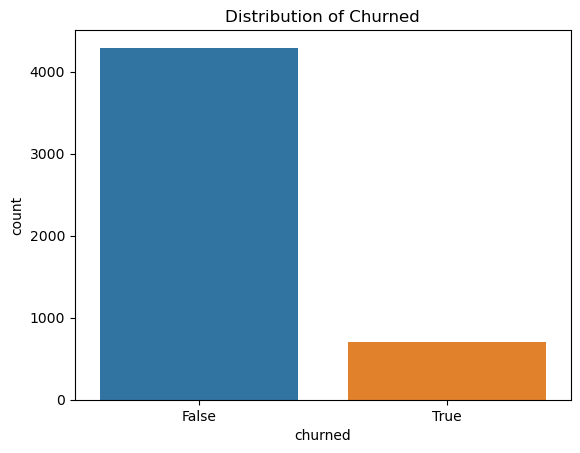

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution
churn_distribution = data['churned'].value_counts()
print(churn_distribution)

# Visualize the distribution
sns.countplot(x='churned', data=data)
plt.title('Distribution of Churned')
plt.show()


Given the skew in the predictor variable, let's split the data with the *churned* values being stratified.

In [27]:
# Splitting the data
# Use stratify=y if the distribution of 'churned' is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
# Use this if the distribution of 'churned' is relatively balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


False    0.858
True     0.142
Name: churned, dtype: float64
False    0.861
True     0.139
Name: churned, dtype: float64


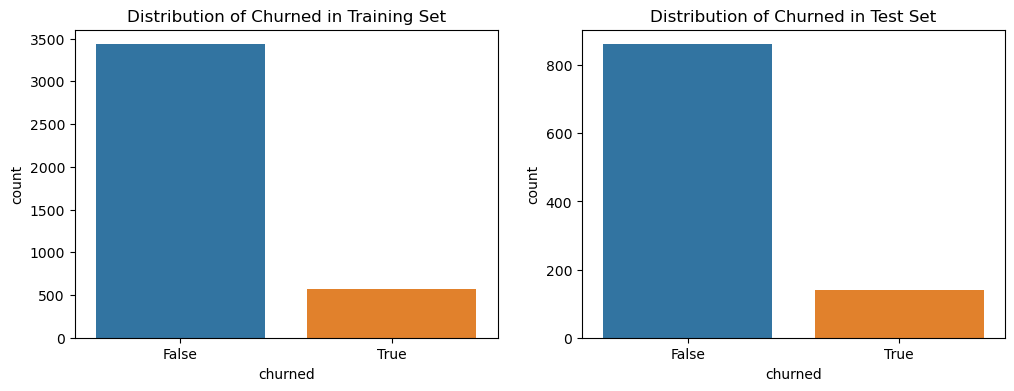

In [29]:
# Check the distribution in the train and test set
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

# Visualize the distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title('Distribution of Churned in Training Set')
sns.countplot(x=y_test, ax=ax[1])
ax[1].set_title('Distribution of Churned in Test Set')
plt.show()



* Fit random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
* Plot the resulting oob errors as a function of the number of trees.

*Hint:* since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.

In [36]:
# Suppress warnings about too few trees from the early models

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [35]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [37]:
# Check if 'phone_number' and 'state' columns exist in the DataFrame, then drop them
columns_to_drop = [col for col in ['state', 'phone_number'] if col in data.columns]
data = data.drop(columns_to_drop, axis=1)

# Continue with the rest of your processing...




/Users/ebaniez/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Done for n_estimators=10
Done for n_estimators=20
Done for n_estimators=30
Done for n_estimators=40
Done for n_estimators=50
Done for n_estimators=60
Done for n_estimators=70
Done for n_estimators=80
Done for n_estimators=90
Done for n_estimators=100
Done for n_estimators=110
Done for n_estimators=120
Done for n_estimators=130
Done for n_estimators=140
Done for n_estimators=150
Done for n_estimators=160
Done for n_estimators=170
Done for n_estimators=180
Done for n_estimators=190
Done for n_estimators=200


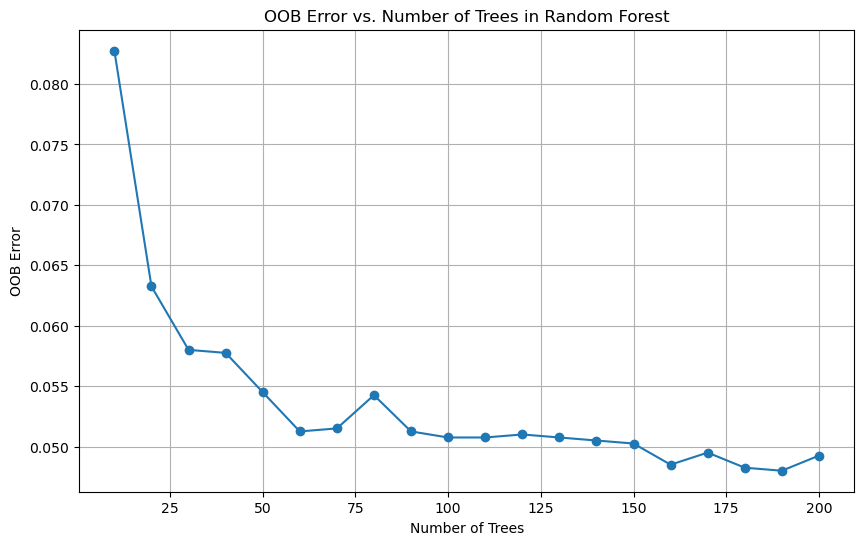

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Sample DataFrame creation
# Replace this with your actual DataFrame
# X, y = ...

# Assuming X has categorical features, we'll use OneHotEncoder
# Select categorical columns which are not numeric
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Apply OneHotEncoder on categorical feature columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concat encoded ones
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables
n_estimators_range = range(10, 210, 10)
oob_errors = []

# Initialize RandomForestClassifier with warm_start=True
model = RandomForestClassifier(oob_score=True, warm_start=True, random_state=42, n_jobs=-1)

# Loop over the range of tree numbers
for n_estimators in n_estimators_range:
    model.set_params(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    oob_error = 1 - model.oob_score_  # OOB error = 1 - OOB Score
    oob_errors.append(oob_error)
    print(f"Done for n_estimators={n_estimators}")

# Plotting the OOB errors
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, oob_errors, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs. Number of Trees in Random Forest')
plt.grid(True)
plt.show()


The error looks like it has stabilized around 100-150 trees.



* Repeat previous exercise using extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model.
* Compare the out-of-bag errors for the two different types of models.

Combine the two dataframes into a single one for easier plotting.

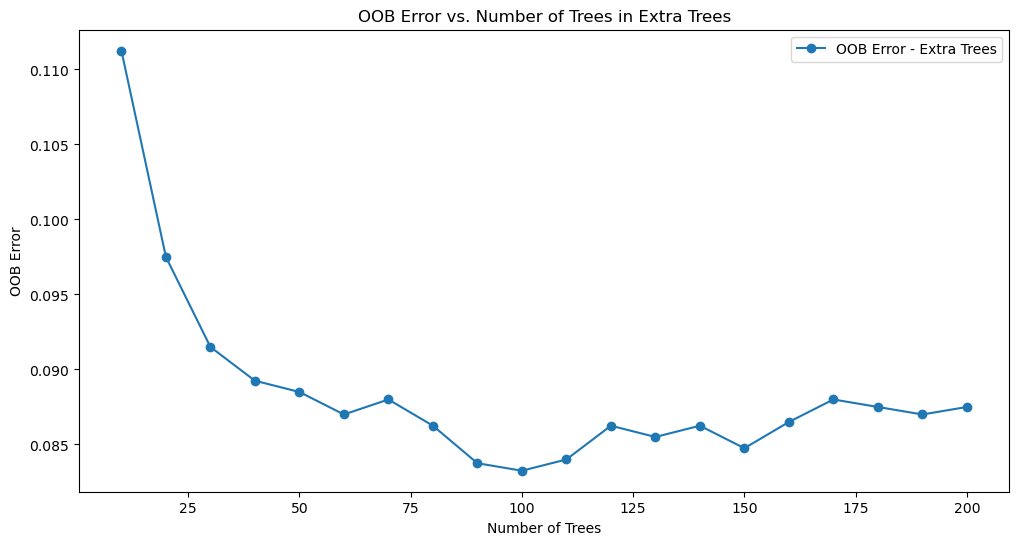

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Initialize ExtraTreesClassifier with bootstrap=True
extra_trees = ExtraTreesClassifier(bootstrap=True, oob_score=True, random_state=42, warm_start=True)

# Number of trees to evaluate
n_estimators_options = range(10, 201, 10)

et_oob_errors = []

for n_estimators in n_estimators_options:
    extra_trees.set_params(n_estimators=n_estimators)
    extra_trees.fit(X_train, y_train)
    oob_error = 1 - extra_trees.oob_score_
    et_oob_errors.append(oob_error)

# Plotting the OOB errors for ExtraTreesClassifier
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_options, et_oob_errors, label="OOB Error - Extra Trees", marker='o')
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error vs. Number of Trees in Extra Trees")
plt.legend()
plt.show()


The random forest model performs consistently better than the extra randomized trees.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier with OOB score enabled
random_forest = RandomForestClassifier(oob_score=True, random_state=42, warm_start=True)

rf_oob_errors = []

for n_estimators in n_estimators_options:
    random_forest.set_params(n_estimators=n_estimators)
    random_forest.fit(X_train, y_train)
    oob_error = 1 - random_forest.oob_score_
    rf_oob_errors.append(oob_error)

# Now rf_oob_errors is defined and can be used for plotting.



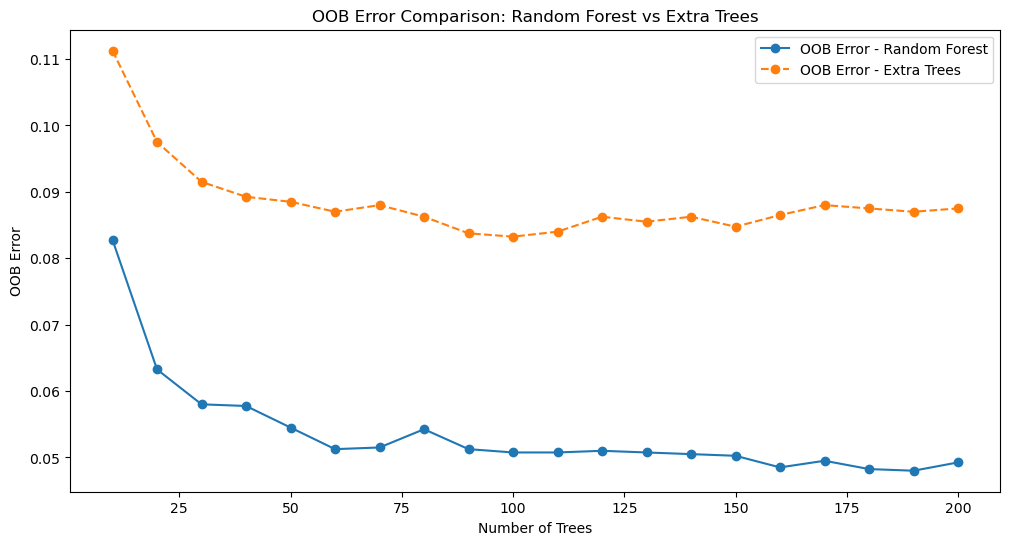

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_options, rf_oob_errors, label='OOB Error - Random Forest', marker='o')
plt.plot(n_estimators_options, et_oob_errors, label="OOB Error - Extra Trees", marker='o', linestyle='--')
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error Comparison: Random Forest vs Extra Trees")
plt.legend()
plt.show()



* Select one of the models that performs well and calculate error metrics and a confusion matrix on the test data set. 

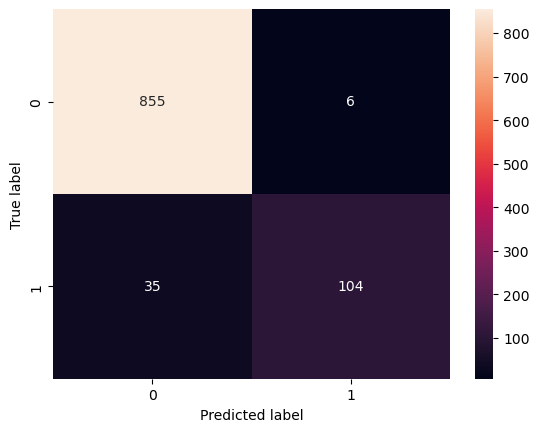

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       861
        True       0.95      0.75      0.84       139

    accuracy                           0.96      1000
   macro avg       0.95      0.87      0.91      1000
weighted avg       0.96      0.96      0.96      1000

Accuracy: 0.96


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Initialize and fit the model with the best number of trees
best_n_estimators = 150
model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.932 (vs 0.85 for random guessing).

Adjusted Confusion Matrix


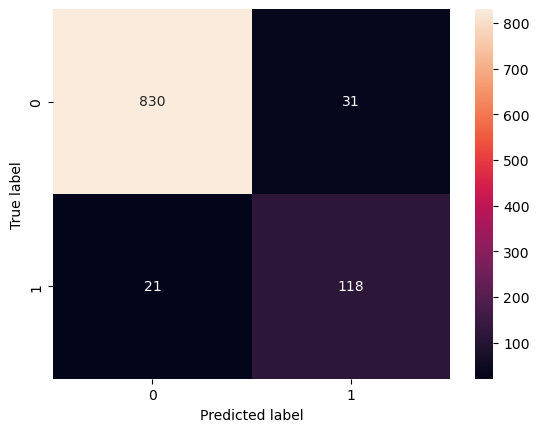


Adjusted Classification Report
              precision    recall  f1-score   support

       False       0.98      0.96      0.97       861
        True       0.79      0.85      0.82       139

    accuracy                           0.95      1000
   macro avg       0.88      0.91      0.89      1000
weighted avg       0.95      0.95      0.95      1000



In [55]:
# Assuming model.predict_proba is available
y_probs = model.predict_proba(X_test)[:, 1]  # probability estimates for the positive class

# Adjust the threshold to improve recall
threshold = 0.3  # example threshold
y_pred_adjusted = (y_probs >= threshold).astype(int)

# New confusion matrix and classification report
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Adjusted Confusion Matrix")
sns.heatmap(cm_adjusted, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("\nAdjusted Classification Report")
print(classification_report(y_test, y_pred_adjusted))




* Print or visualize the confusion matrix.
* Plot the ROC-AUC and precision-recall curves.
* Plot the feature importances.

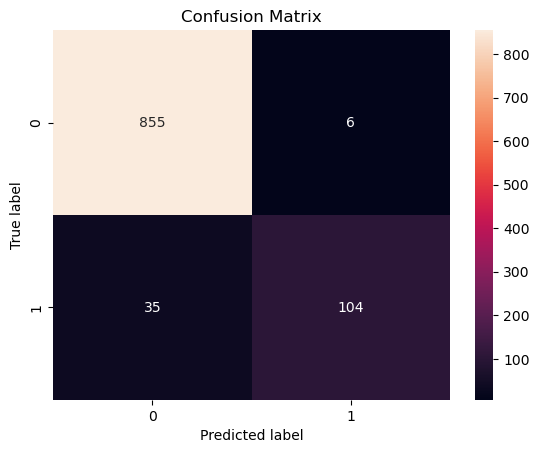

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The ROC-AUC and precision-recall curves.

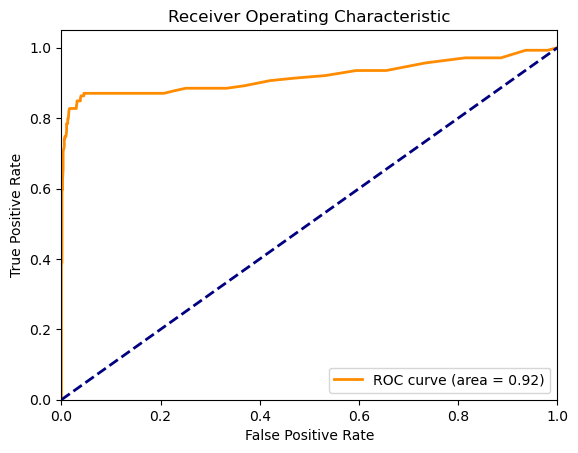

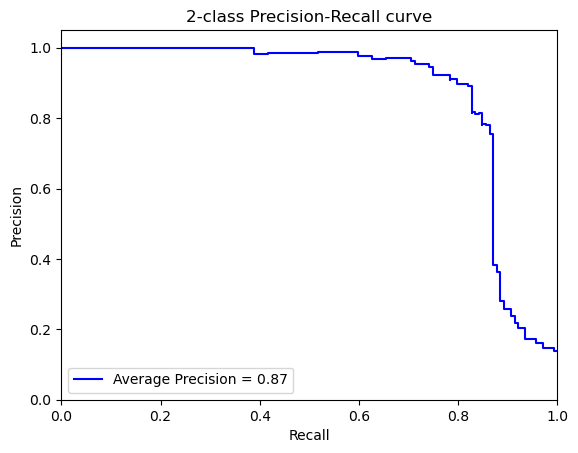

In [57]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Calculate probabilities for the positive class
y_score = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post', color='b', label='Average Precision = %0.2f' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


The feature importances. Total daily cost is the biggest predictor of customer churn.

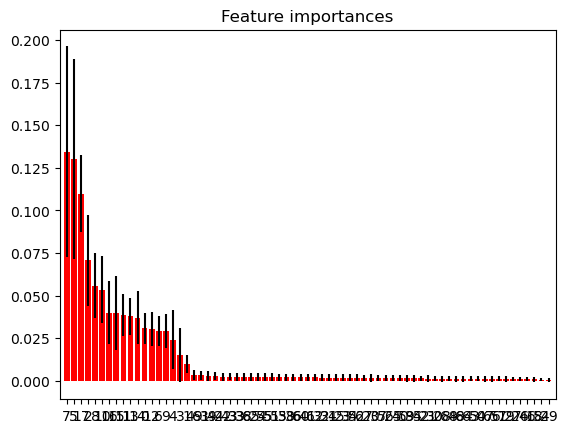

In [58]:
# Assuming model has feature_importances_ attribute
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
